### Fitness & Body Fat Analysis
**Identify relationships between age/body measurements and body fat. Identify what may cause changes in body fat levels. Hypothesis: Increase in age and certain body measurements are indicators for increased body fat.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('data/bodyfat.csv')

**Determine the shape of the data through initial analysis**

In [3]:
df['Density'].tolist()

[1.0708,
 1.0853,
 1.0414,
 1.0751,
 1.034,
 1.0502,
 1.0549,
 1.0704,
 1.09,
 1.0722,
 1.083,
 1.0812,
 1.0513,
 1.0505,
 1.0484,
 1.0512,
 1.0333,
 1.0468,
 1.0622,
 1.061,
 1.0551,
 1.064,
 1.0631,
 1.0584,
 1.0668,
 1.0911,
 1.0811,
 1.0468,
 1.091,
 1.079,
 1.0716,
 1.0862,
 1.0719,
 1.0502,
 1.0263,
 1.0101,
 1.0438,
 1.0346,
 1.0202,
 1.0258,
 1.0217,
 1.025,
 1.0279,
 1.0269,
 1.0814,
 1.067,
 1.0742,
 1.0665,
 1.0678,
 1.0903,
 1.0756,
 1.084,
 1.0807,
 1.0848,
 1.0906,
 1.0473,
 1.0524,
 1.0356,
 1.028,
 1.043,
 1.0396,
 1.0317,
 1.0298,
 1.0403,
 1.0264,
 1.0313,
 1.0499,
 1.0673,
 1.0847,
 1.0693,
 1.0439,
 1.0788,
 1.0796,
 1.068,
 1.072,
 1.0666,
 1.079,
 1.0483,
 1.0498,
 1.056,
 1.0283,
 1.0382,
 1.0568,
 1.0377,
 1.0378,
 1.0386,
 1.0648,
 1.0462,
 1.08,
 1.0666,
 1.052,
 1.0573,
 1.0795,
 1.0424,
 1.0785,
 1.0991,
 1.077,
 1.073,
 1.0582,
 1.0484,
 1.0506,
 1.0524,
 1.053,
 1.048,
 1.0412,
 1.0578,
 1.0547,
 1.0569,
 1.0593,
 1.05,
 1.0538,
 1.0355,
 1.0486,
 1.0503,


In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
has_null = df.isnull().values.any()
print(has_null)

False


In [6]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.count()

Density    252
BodyFat    252
Age        252
Weight     252
Height     252
Neck       252
Chest      252
Abdomen    252
Hip        252
Thigh      252
Knee       252
Ankle      252
Biceps     252
Forearm    252
Wrist      252
dtype: int64

In [9]:
df.shape

(252, 15)

In [10]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [11]:
print(df.median())

Density      1.0549
BodyFat     19.2000
Age         43.0000
Weight     176.5000
Height      70.0000
Neck        38.0000
Chest       99.6500
Abdomen     90.9500
Hip         99.3000
Thigh       59.0000
Knee        38.5000
Ankle       22.8000
Biceps      32.0500
Forearm     28.7000
Wrist       18.3000
dtype: float64


<Axes: title={'center': 'BodyFat'}, xlabel='Age'>

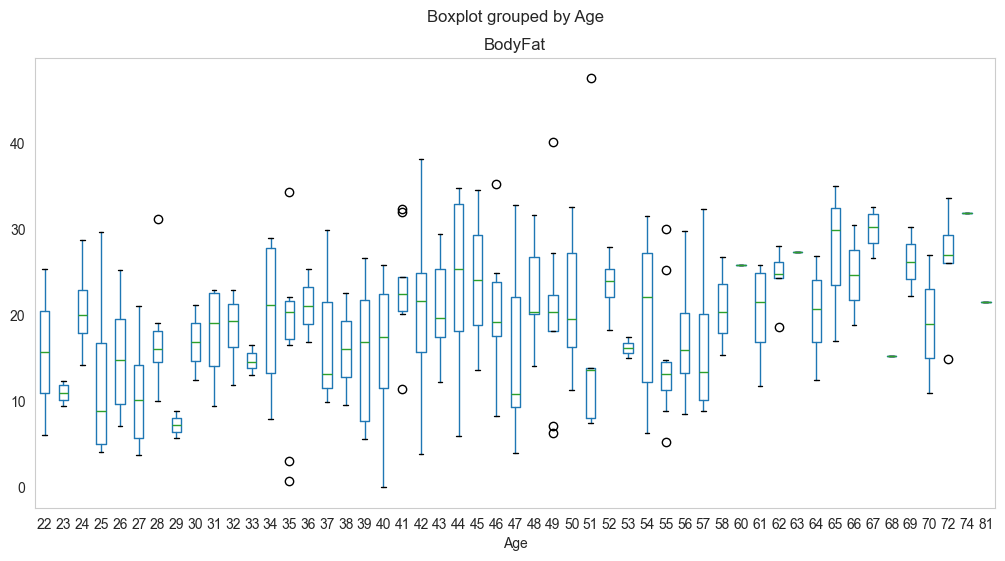

In [12]:
df.boxplot(by ='Age', column =['BodyFat'], grid = False, figsize=(12, 6)) 


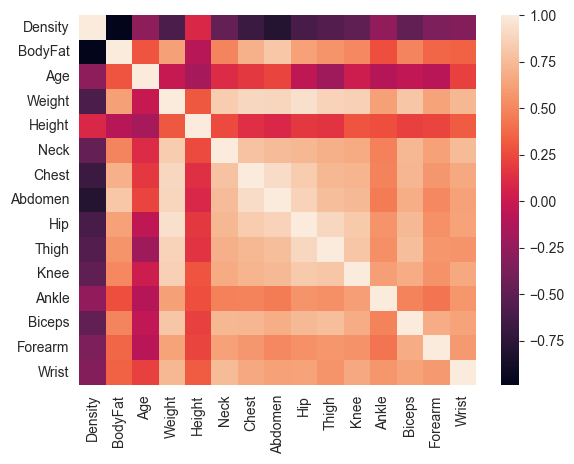

In [13]:
sns.heatmap(df.corr());

**Slight increase in average body fat at age of 34, however average peak occurs at 44 and then again at the mid 60's**

Text(0.5, 1.0, 'BodyFat By Age')

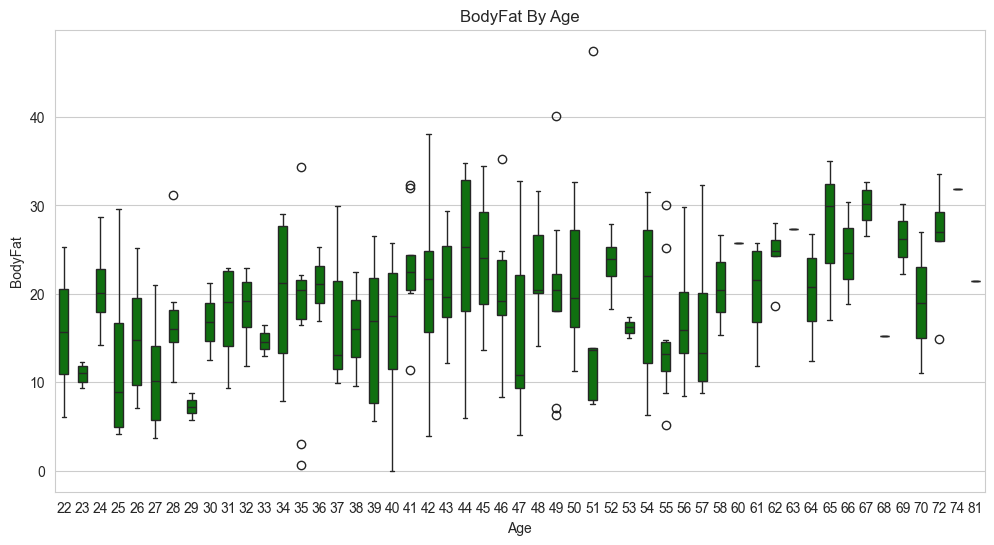

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x = df['Age'], y = df['BodyFat'], color = "green", width = .5)
plt. title('BodyFat By Age')

<Axes: >

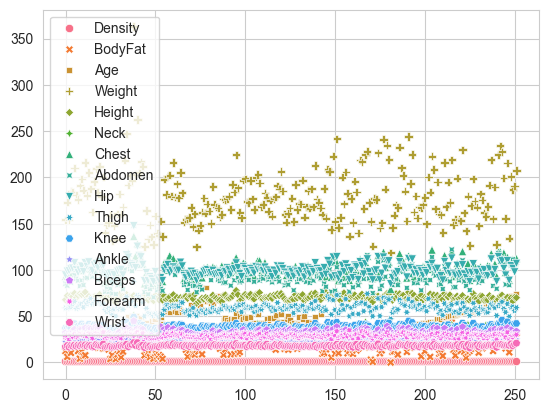

In [15]:
sns.scatterplot(df)

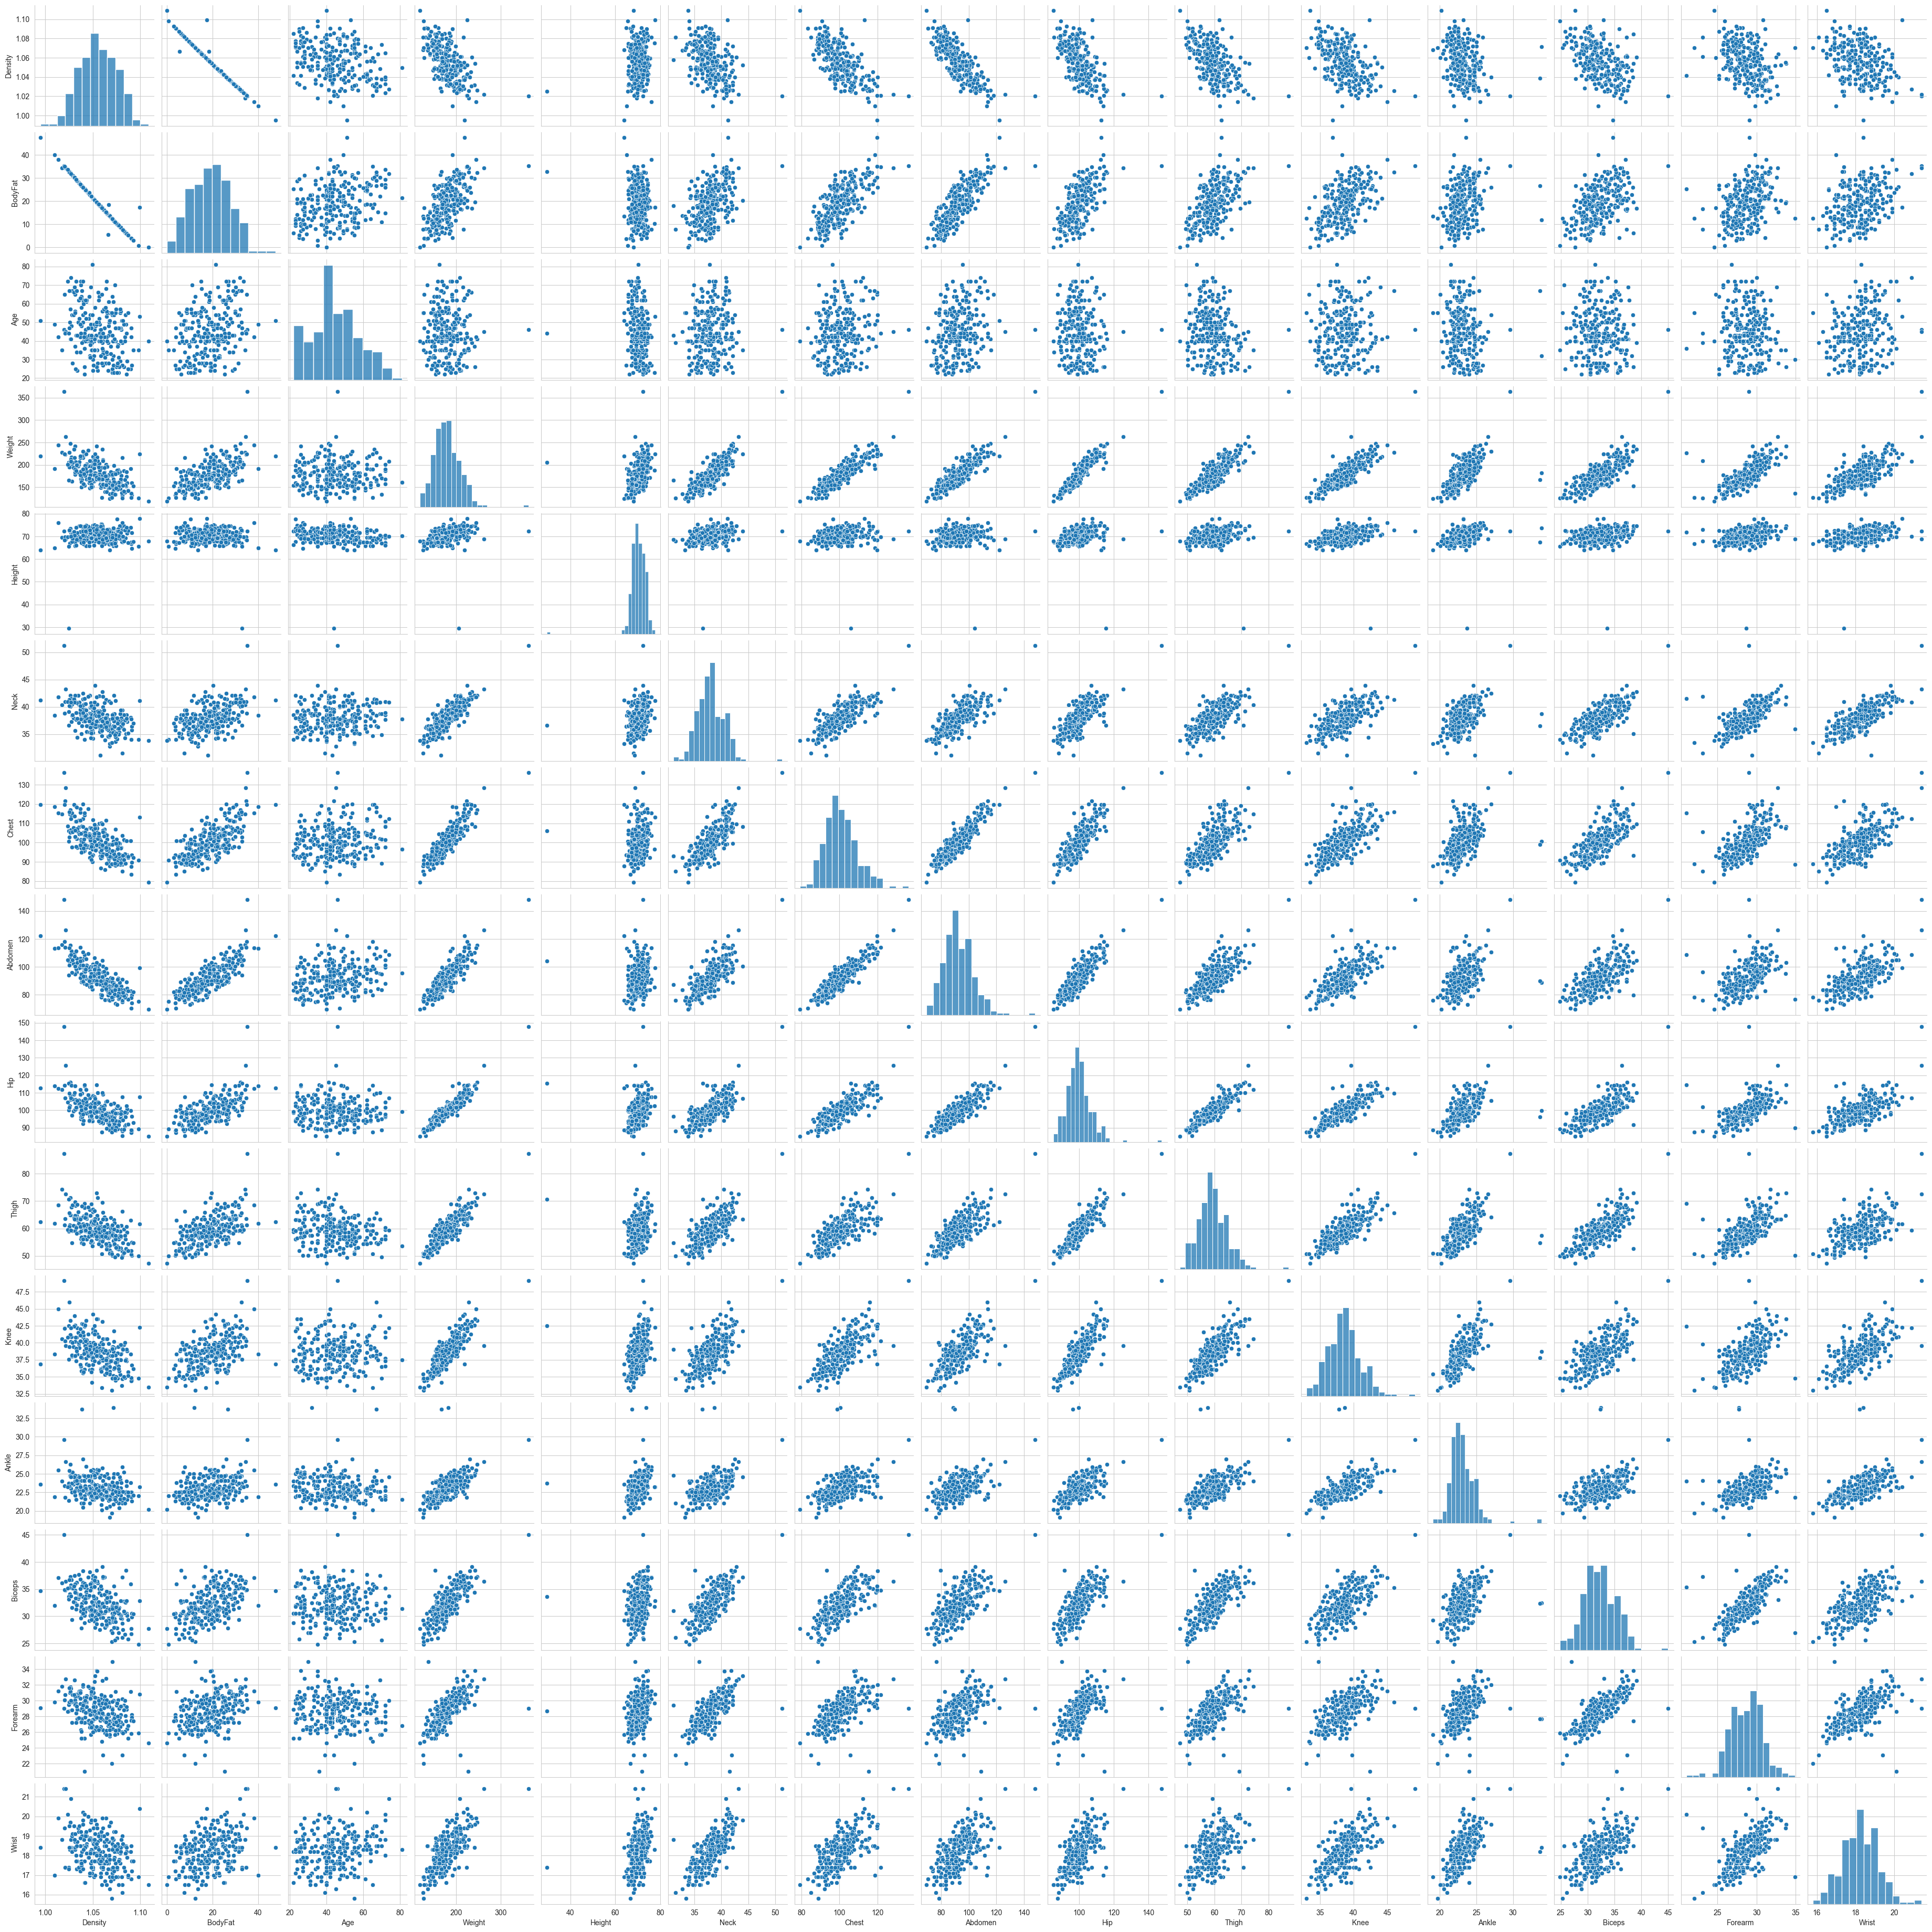

In [16]:
sns.pairplot(df)

Text(0.5, 1.0, 'BodyFat')

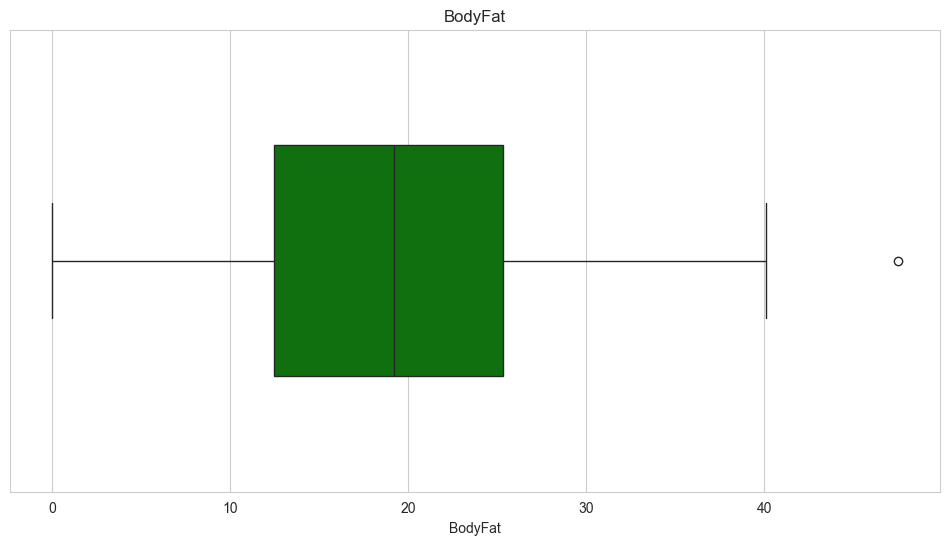

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x = df['BodyFat'], color = "green", width = .5)
plt. title('BodyFat')

In [18]:
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [19]:
df.Density

0      1.0708
1      1.0853
2      1.0414
3      1.0751
4      1.0340
        ...  
247    1.0736
248    1.0236
249    1.0328
250    1.0399
251    1.0271
Name: Density, Length: 252, dtype: float64

In [20]:
bf_age = pd.DataFrame(df.BodyFat, df.Age)

In [21]:
bf_age

,BodyFat
Age,
23,17.7
22,15.6
22,15.6
26,7.9
24,14.0
...,...
70,24.3
72,8.5
72,8.5


In [22]:
diff = np.log(bf_age).diff()

In [23]:
diff.head()

,BodyFat
Age,
23,NaN
22,-0.126294
22,0.000000
26,-0.680408
24,0.572195


In [24]:
bf_age.corr()

,BodyFat
BodyFat,1.0


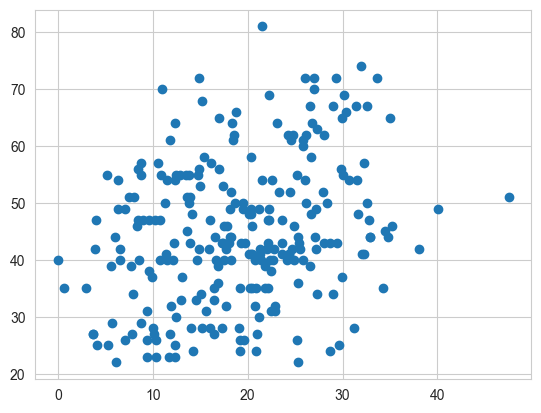

In [25]:
plt.scatter(x=df.BodyFat, y=df.Age) 

In [26]:
lr = np.polyfit(df.Age, df.BodyFat, deg=1)
lr

array([ 0.19355121, 10.46326299])

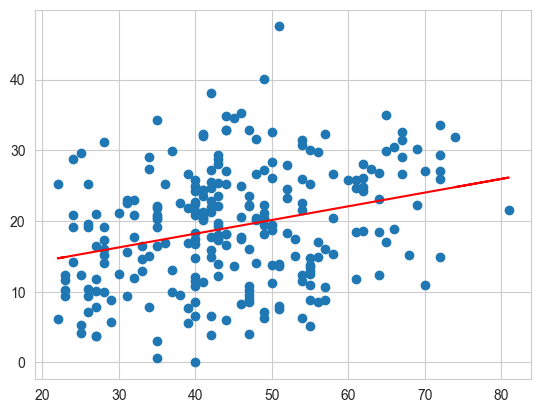

In [27]:
slope = np.polyval(lr, df.Age)
plt.scatter(df.Age, df.BodyFat)
plt.plot(df.Age, slope, 'r')

In [28]:
X = df['Age'].reset_index()
Y = df['BodyFat']
#X.head(10)

**Data is split between training and testing to predict body fat levels**

In [29]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred = model.predict(x_test)
y_pred

array([17.42072518, 20.24920458, 18.74146055, 18.15997613, 18.3930347 ,
       17.67351942, 16.32758606, 16.02035168, 22.99379132, 17.01128064,
       19.49305432, 18.72486318, 19.73238951, 18.07922177, 19.29663074,
       15.62638828, 19.97546688, 20.93947772, 20.17330865, 25.13311382,
       20.99361591, 17.82814765, 16.00861275, 17.94007467, 20.94119785,
       15.58317473, 18.53187985, 23.55209981, 19.88671578, 22.27741435,
       23.54036088, 18.00736998, 24.79612496, 17.07999412, 15.45202438,
       19.05041505, 17.40898625, 19.42231877, 21.3423437 , 21.05686707,
       19.85979766, 16.52542783, 19.71437396, 20.79577414, 23.00553025,
       23.35425804, 24.24065282, 18.24730905, 18.01738879, 20.97013804,
       21.71454937])

In [32]:
model.score(x_test, y_test)

0.0038213829757730577

In [33]:
model.intercept_

np.float64(10.152393996975311)

In [34]:
model.coef_

array([0.01173893, 0.16262496])

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(9.20128130197736)

**Identify the columns that are predictors of body fat**

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
X = df
y = df.BodyFat
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
X_new = selector.transform(X)
selected_features_indices = selector.get_support(indices=True)
X_selected_df = pd.DataFrame(X, columns=X.columns[selected_features_indices])

X_selected_df
X.columns[selected_features_indices]


Index(['Density', 'Weight', 'Chest', 'Abdomen', 'Hip'], dtype='object')

In [37]:
X = df[['BodyFat','Age']]
Y = df[['Density', 'Weight', 'Chest', 'Abdomen', 'Hip']]

In [38]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred = model.predict(x_test)
y_pred

array([[  1.04714167, 178.77548918, 103.14301323,  96.65781563,
         99.68911393],
       [  1.04098281, 186.22021937, 105.1051006 ,  99.46621759,
        101.66645159],
       [  1.04878998, 183.55984439, 102.654179  ,  95.46069506,
        101.12920762],
       [  1.07701428, 158.10201654,  93.70885365,  82.02133643,
         94.58395096],
       [  1.06742553, 166.0115127 ,  96.74392396,  86.63574706,
         96.59273471],
       [  1.05287341, 179.00035381, 101.35529825,  93.57392784,
         99.92760508],
       [  1.0417287 , 191.92809184, 104.90286708,  98.69160068,
        103.34765194],
       [  1.05860515, 179.22521844,  99.56758326,  90.49004005,
        100.16609624],
       [  1.07861682, 159.88794797,  93.21824965,  81.04583581,
         95.15134077],
       [  1.07588705, 163.06216265,  94.08722931,  82.29884754,
         95.99128331],
       [  1.07457512, 148.41711464,  94.41827639,  83.9640754 ,
         91.69590206],
       [  1.08082794, 158.38648058,  92.520

In [40]:
model.score(x_test, y_test)

0.5426343118408291

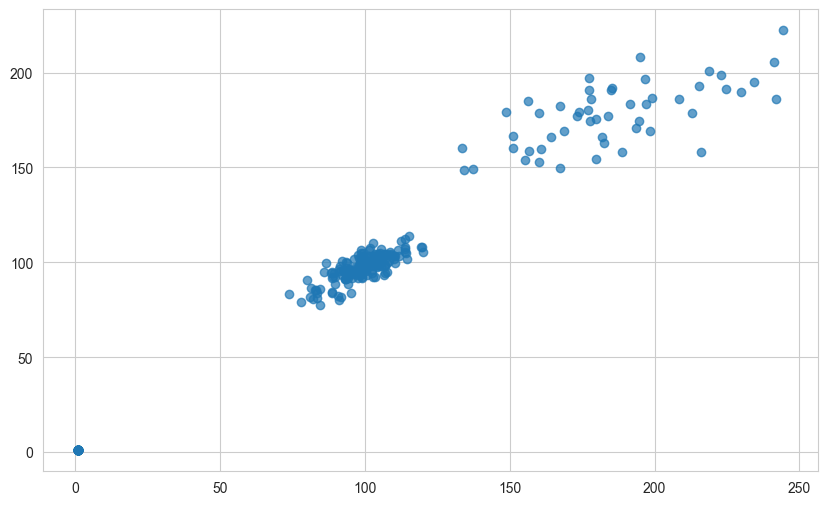

In [53]:
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

In [42]:
y_test.min()

Density      1.014
Weight     133.500
Chest       86.700
Abdomen     73.700
Hip         88.500
dtype: float64

In [54]:
y_test.max()

Density      1.0862
Weight     244.2500
Chest      119.9000
Abdomen    113.7000
Hip        114.4000
dtype: float64

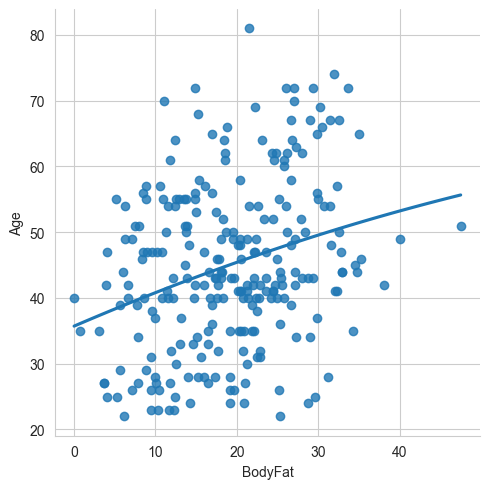

In [43]:
sns.lmplot(x="BodyFat", y="Age", data = df, order = 2, ci = None)
plt.show()